In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
#read the csv file
df = pd.read_csv('BikeDataCleaned.csv')

# Quick look at the data
df.head()

,HomeOwnerFlag,YearlyIncome,AveMonthSpend,BikeBuyer,CountryRegionName_In_Europe,Education_Below_Bachelors,Occupation_Clerical_Manual,Occupation_Management_Professional,Gender_M,MaritalStatus_S,NumberCarsOwned_3_Or_More,NumberChildrenAtHome_2_Or_More
0,0,239.033470,4.406719,1,1,0,1,0,1,1,0,0
1,0,155.132202,3.610918,0,1,0,1,0,0,1,0,0
2,1,352.900836,4.787492,1,0,0,1,0,1,1,0,1
3,0,295.514805,3.761200,0,0,0,0,1,0,1,0,0
4,0,166.198676,4.276666,1,1,1,1,0,1,1,0,0


The above dataset has been cleaned, all that remains is scaling

In [4]:
# Isolate the target variable
y = df.BikeBuyer  

# Isolate the feature variables
X = df.drop('BikeBuyer', axis = 1)

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 12)

# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/zum/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


It's advised to apply a gridsearch to your models, so one can pinpoint the exact parameters that are best.

For the sake of simplicity, we'll just use the default model parameters.

(Note that probability estimates aren't available for the default SGDC classifier, because of it's default loss parameter. As such, we'll try some other loss parameters for the SGDC classifier.)

<Figure size 792x648 with 0 Axes>

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/Users/zum/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
       max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)

(0.0, 1.0)

(0.0, 1.05)

Text(0.5,0,'1-Specificity (False Positive Rate)')

Text(0,0.5,'Sensitivity (True Positive Rate)')

Text(0.5,1,'Receiver Operating Characteristic')

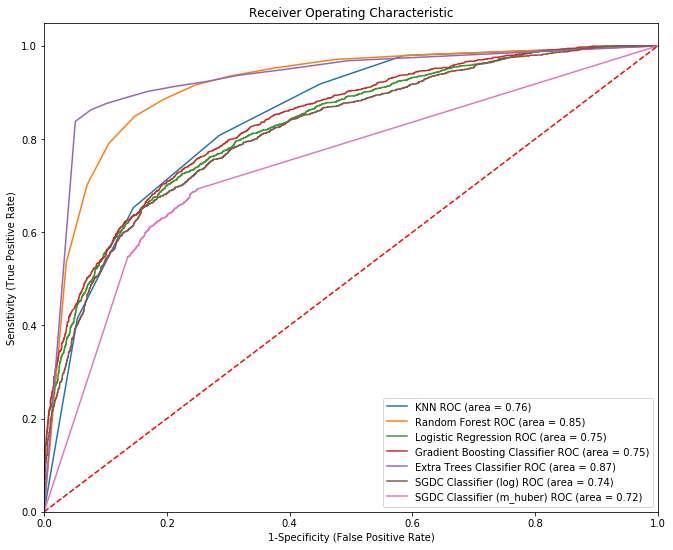

In [5]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Define the models you want to use
models = [
 {'label': 'KNN', 'model': KNeighborsClassifier()},
 {'label': 'Random Forest', 'model': RandomForestClassifier()},
 {'label': 'Logistic Regression', 'model': LogisticRegression()},
 {'label': 'Gradient Boosting Classifier', 'model': GradientBoostingClassifier()},
 {'label': 'Extra Trees Classifier', 'model': ExtraTreesClassifier()},
 {'label': 'SGDC Classifier (log)', 'model' : SGDClassifier(loss = 'log')},
 {'label': 'SGDC Classifier (m_huber)', 'model' : SGDClassifier(loss = 'modified_huber')}
  ]

# Define the size of the figure
plt.figure(figsize = [11,9])


for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])  
    auc = metrics.roc_auc_score(y_test,model.predict(X_test)) 
    plt.plot(fpr, tpr, label ='%s ROC (area = %0.2f)' % (m['label'], auc)) 
        
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()   